# **Prepare a model for glass classification using KNN**

In [28]:

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [3]:
glass=pd.read_csv('glass.csv')

In [5]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [39]:
glass.shape

(214, 10)

In [4]:
#Print variable information on  dataset
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There is no null values in the datset and even not any categorical columns is present.  

In [40]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


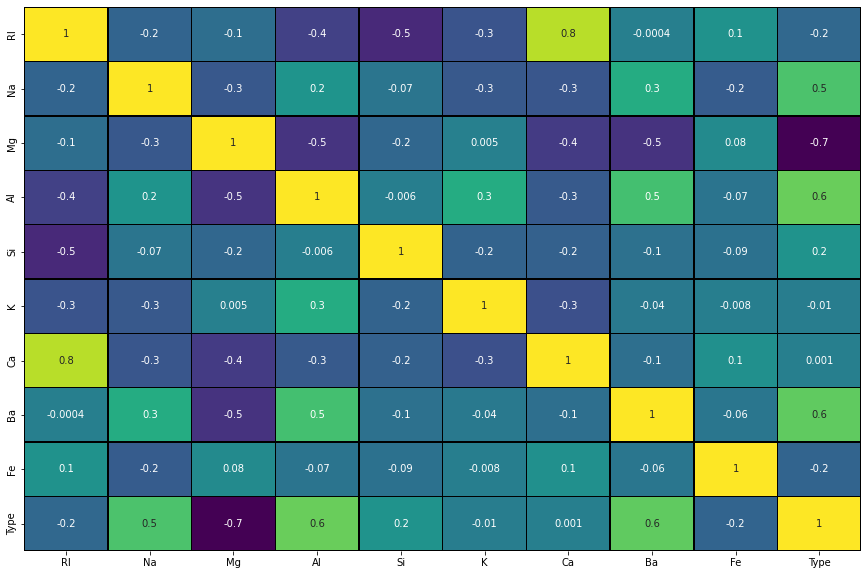

In [45]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(glass.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

In [7]:
# slicing it into independent and dependent variables
X=glass.iloc[:,0:9]
y=glass.iloc[:,-1]

In [8]:
# importing train_test_split
from sklearn.model_selection import train_test_split


#Splitting into train and test data
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.20, random_state = 0)

Next, we are doing feature scaling to the training and test set of independent variables for reducing the size to smaller values

In [9]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler

#Instantiate StandardScaler
sc = sc = StandardScaler()

#fit transform sc on X_train
X_train = sc.fit_transform(X_train)

#Transform scaling on X_test
X_test = sc.transform(X_test)

Now we have to create and train the K Nearest Neighbor model with the training set

In [10]:
#Instantiate KNeighborsClassifier with n_neighbors as 5,  metric as 'minkowski' and p as 2
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#fitting classifier on training data
classifier.fit(X_train, y_train)

KNeighborsClassifier()

We are using 3 parameters in the model creation. n_neighbors is setting as 5, which means 5 neighborhood points are required for classifying a given point. The distance metric we are using is Minkowski, the equation for it is given below


p = 1 , Manhattan Distance
p = 2 , Euclidean Distance
p = infinity , Cheybchev Distance

In our problem, we are choosing the p as 2 (also we can choose the metric as “euclidean”) Our Model is created, now we have to predict the output for the test set


In [11]:
#prediction on X_test 
y_pred = classifier.predict(X_test)

In [12]:
y_test

197    7
37     1
89     2
176    6
170    5
75     2
96     2
137    2
5      1
83     2
55     1
145    2
160    3
112    2
74     2
202    7
126    2
12     1
153    3
158    3
168    5
141    2
194    7
189    7
144    2
18     1
208    7
15     1
86     2
71     2
7      1
63     1
143    2
97     2
136    2
162    3
33     1
154    3
90     2
191    7
106    2
180    6
139    2
Name: Type, dtype: int64

In [13]:
y_pred

array([7, 1, 2, 6, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 7, 1, 2, 1, 2, 5, 1,
       7, 7, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 2, 2, 2])

We can evaluate our model using the confusion matrix and accuracy score by comparing the predicted and actual test values

In [14]:
# import confusion_matrix and accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score

#confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#accuracy_score
ac =  accuracy_score(y_test,y_pred)


# print accuracy_score and confusion_matrix
print(ac)
print(cm)

0.6046511627906976
[[ 7  2  0  0  0  0]
 [ 8 11  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  6]]


we see that our model is good but not that much.

Choosing the best K value by using Grid Search for Algorithm Tuning

In [25]:
from sklearn import neighbors
from sklearn import metrics

In [26]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1,26)

# empty list to append scores
scores = []

# loop through k_range
for k in k_range:
    
    #Initiate KNN with n_neighbors as k
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    #Fitting model on training data

    classifier.fit(X_train, y_train) 
    
    
    #Predict on X_test
    y_pred =classifier.predict(X_test) 
    
    # We append the scores in the dictionary in list
    scores.append(metrics.accuracy_score(y_test, y_pred))

    
#print scores
print(scores)

[0.6744186046511628, 0.5813953488372093, 0.6511627906976745, 0.627906976744186, 0.6046511627906976, 0.627906976744186, 0.5581395348837209, 0.627906976744186, 0.6046511627906976, 0.6046511627906976, 0.6046511627906976, 0.5813953488372093, 0.6046511627906976, 0.6046511627906976, 0.6046511627906976, 0.5813953488372093, 0.6046511627906976, 0.6046511627906976, 0.6046511627906976, 0.5813953488372093, 0.5813953488372093, 0.5813953488372093, 0.5581395348837209, 0.5581395348837209, 0.5813953488372093]


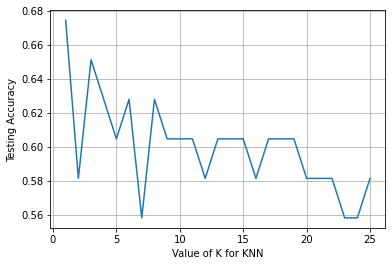

In [29]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()
plt.show()

From above chart you can see that k value for 1 increases the accuracy 

In [30]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [31]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)
model1=KNeighborsClassifier()
grid=GridSearchCV(estimator=model1,param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [32]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


# **Preparing model for zoo dataset for Animal_Classification**

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [68]:
zoo=pd.read_csv('/content/Zoo.csv')

In [69]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [70]:
zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [71]:
zoo.shape

(101, 18)

In [72]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [73]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [74]:
zoo["type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [75]:
zoo['type'].value_counts().sort_index(ascending=True)

1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: type, dtype: int64

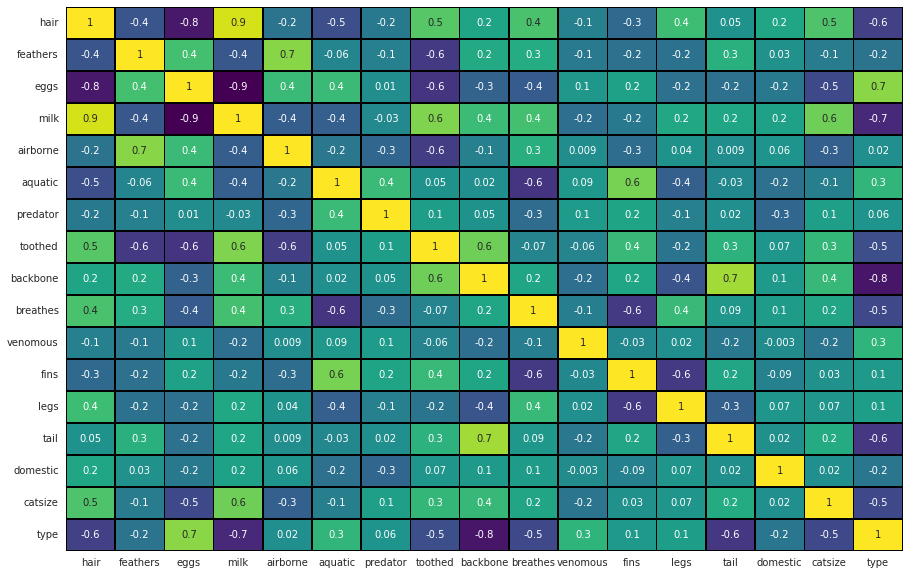

In [76]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


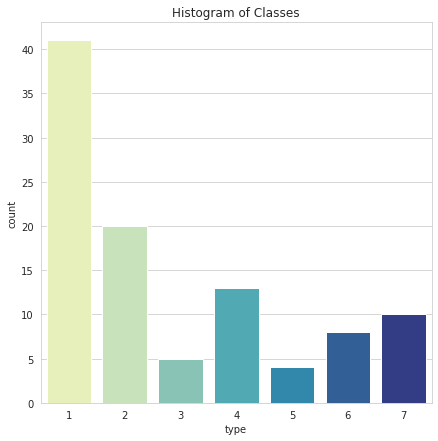

In [77]:
# Set default plot grid:

sns.set_style('whitegrid')

# Plot histogram of classes:

plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(zoo['type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")
plt.show()

In [78]:
zoo.drop(['animal name'], axis=1, inplace=True)

In [79]:
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [80]:
#spliting idependent and dependent
x = zoo.drop('type',axis=1)
y = zoo[['type']]

In [81]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [51]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (70, 16)
Shape of X_test:  (31, 16)
Shape of y_train:  (70, 1)
Shape of y_test (31, 1)


In [87]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler

#Instantiate StandardScaler
sc = sc = StandardScaler()

#fit transform sc on X_train
X_train = sc.fit_transform(x_train)

#Transform scaling on X_test
X_test = sc.transform(x_test)

In [88]:
from sklearn import neighbors
from sklearn import metrics

In [89]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1,26)

# empty list to append scores
scores = []

# loop through k_range
for k in k_range:
    
    #Initiate KNN with n_neighbors as k
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    #Fitting model on training data

    classifier.fit(X_train, y_train) 
    
    
    #Predict on X_test
    y_pred =classifier.predict(X_test) 
    
    # We append the scores in the dictionary in list
    scores.append(metrics.accuracy_score(y_test, y_pred))

    
#print scores
print(scores)

[0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.9032258064516129, 0.8709677419354839, 0.8709677419354839, 0.8387096774193549, 0.8387096774193549, 0.8064516129032258, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.8064516129032258, 0.8064516129032258, 0.7741935483870968]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

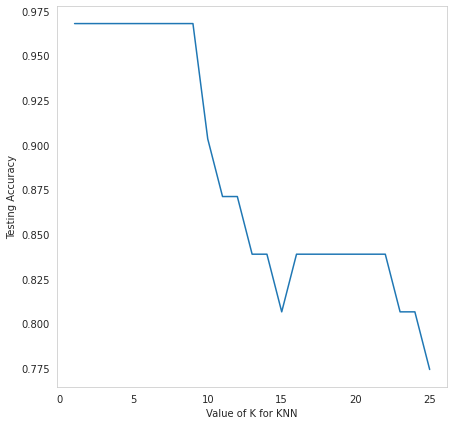

In [90]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()
plt.show()

From above chart you can see that k value after 1 increases the accuracy and same accuracy is maintained till k=10

In [92]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)
model1=KNeighborsClassifier()
grid=GridSearchCV(estimator=model1,param_grid=param_grid)
grid.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [93]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}
